In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

read the dataset

In [87]:
df = pd.read_csv(r"dataset\ai4i2020.csv")

<h2>Data Preprocessing</h2>

In [88]:
df.shape
#10000 record with 14 cols 

(10000, 14)

checking the datatype of each column

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

<h3>About the columns </h3>
<ol>
  <li>UID: unique identifier ranging from 1 to 10000</li>
  <li>
    Product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
  </li>
  <li>Type: just the product type L, M or H from column 2</li>
  <li>
    Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
  </li>
  <li>
    Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
  </li>
  <li>
    Rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
  </li>
  <li>
    Torque [Nm]: torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm and no negative values.
  </li>
  <li>
    Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
  </li>
  <li>
    A 'machine failure' label that indicates whether the machine has failed in this particular datapoint for any of the following failure modes are true.
  </li>
</ol>


In [90]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


checking for null values

In [91]:
df.isna().sum() # no null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

checking for duplicate values

In [92]:
df.duplicated().sum() # no duplicate values

np.int64(0)

the type of the machine could have an effect on the failure of the machine, hence its an imp feature. but as it has categorical values, we convert it to numerical form

In [93]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


In [94]:
df["Type"] =  encoder.fit_transform(df["Type"])
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,2,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,1,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,1,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,2,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,2,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


Now we have our data, all into numerical format.

Checking for outliers and removing them, there is a possibility that because each product/ machine is different there would not be any outliers

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Air temperature [K]'),
  Text(1, 0, 'Process temperature [K]'),
  Text(2, 0, 'Rotational speed [rpm]'),
  Text(3, 0, 'Torque [Nm]'),
  Text(4, 0, 'Tool wear [min]')])

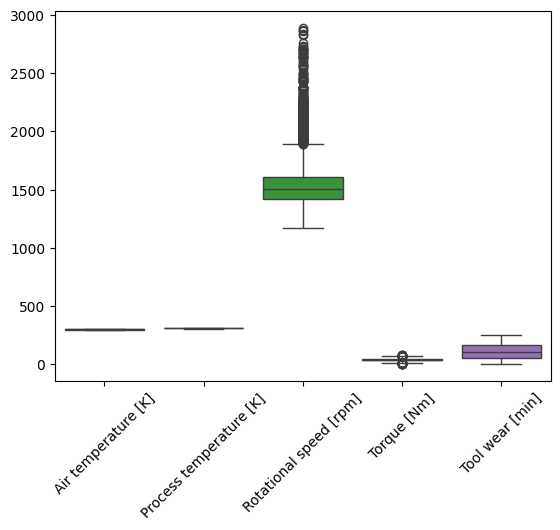

In [95]:
import seaborn as sns
out_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
sns.boxplot(df[out_cols])
plt.xticks(rotation=45)


Rotational speed seems to have a lot of outliers we need to check further on it

Text(0.5, 1.0, 'Histogram for Rotational Speed')

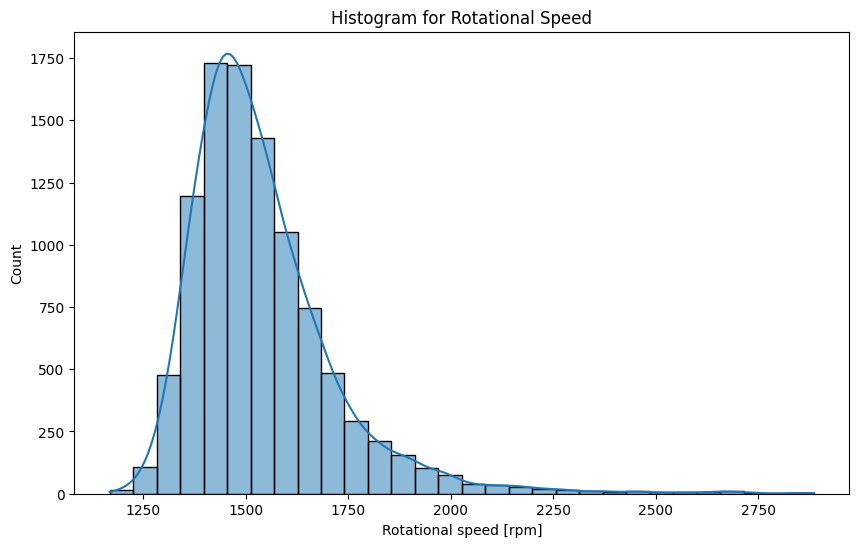

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Rotational speed [rpm]"], kde=True, bins=30)
plt.title("Histogram for Rotational Speed")

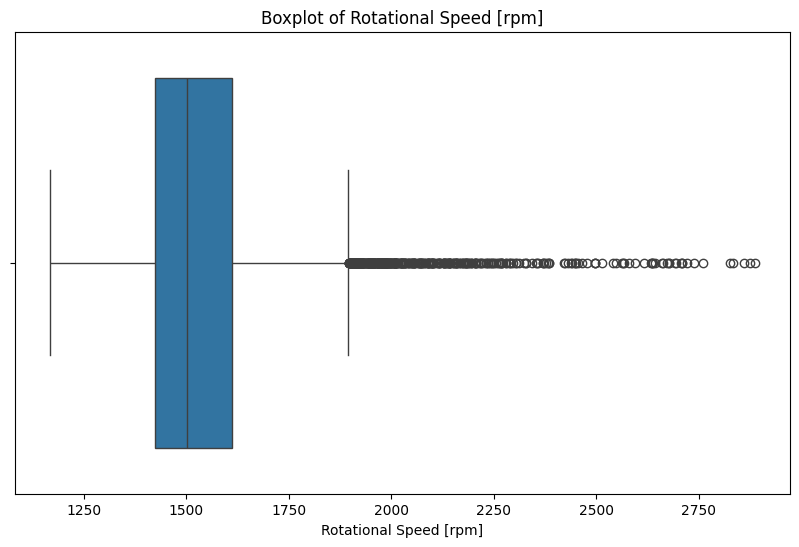

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Rotational speed [rpm]"])
plt.title('Boxplot of Rotational Speed [rpm]')
plt.xlabel('Rotational Speed [rpm]')
plt.show()  


In [98]:

Q1 = df["Rotational speed [rpm]"].quantile(0.25)
Q3 = df["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.concat([
    df[df["Rotational speed [rpm]"] < lower_bound],
    df[df["Rotational speed [rpm]"] > upper_bound]
])

# Display outliers
print(outliers[["Product ID", "Rotational speed [rpm]"]])

#418 rows seem to be outliers



     Product ID  Rotational speed [rpm]
14       L47194                    2035
50       L47230                    2861
70       M14930                    1924
101      L47281                    1991
155      H29569                    1987
...         ...                     ...
9865     M24725                    2450
9871     M24731                    1947
9886     L57066                    1903
9926     M24786                    1897
9939     H39353                    2636

[418 rows x 2 columns]


lets check if the outliers are true outliers or not, by plotting a scatter plot to show the realtion between high rotational speed and machine failure

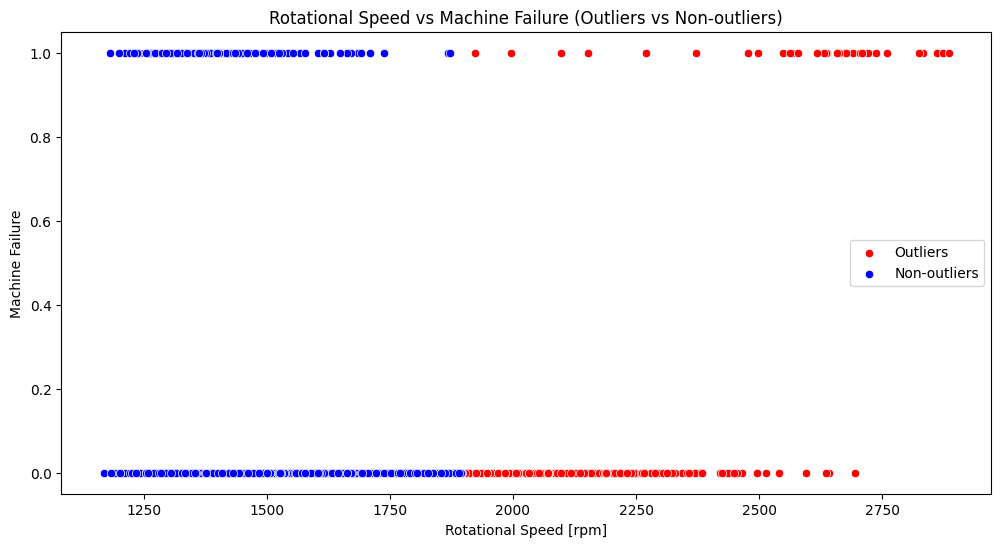

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
#sepa
non_outliers = df[(df["Rotational speed [rpm]"] >= lower_bound) & (df["Rotational speed [rpm]"] <= upper_bound)]

# Plot Machine Failure vs Rotational Speed for outliers and non-outliers
plt.figure(figsize=(12, 6))
#outlier
sns.scatterplot(x="Rotational speed [rpm]", y="Machine failure", data=outliers, color="red", label="Outliers")
#non-outliers
sns.scatterplot(x="Rotational speed [rpm]", y="Machine failure", data=non_outliers, color="blue", label="Non-outliers")

plt.title('Rotational Speed vs Machine Failure (Outliers vs Non-outliers)')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Machine Failure')
plt.legend()
plt.show()


we can see that high rotate speed do relate with the machine failure, hence they are not outliers. Hence the data is clean.

<h4>To predict the Machine Failure I have decided to use these following features along with the reason.</h4>

<ol>
  <li>
    <strong>Type:</strong> H - high quality machine might have less failures, compared to L - low quality machines
  </li>
  <li>
    <strong>Air temp:</strong> Environment temp can affect machine cooling, could be a critical factor
  </li>
  <li>
    <strong>Process temp:</strong> Operating temp can have an impact on overheating
  </li>
  <li>
    <strong>Rotational speed:</strong> High rotational speed could result in increased wear and tear
  </li>
  <li>
    <strong>Torque:</strong> This represents the load on the machine, overloading could be the reason for failure
  </li>
  <li>
    <strong>Tool wear:</strong> This is most important, as it indicates direct degradation of the products
  </li>
</ol>


Split into Target and Training Columns and sample the data

In [100]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

there are more number of non-failure, compared to failure, so we will balance it 

In [101]:
non_failure = df[df['Machine failure'] == 0]
failure = df[df["Machine failure"] == 1]

print("Non Failure:", non_failure.shape)
print("Failure:", failure.shape)

Non Failure: (9661, 14)
Failure: (339, 14)


In [102]:
non_failure_sampled = non_failure.sample(n = 339)
non_failure_sampled.shape

(339, 14)

In [103]:
sampled_df = pd.concat([non_failure_sampled, failure], axis=0)

In [104]:
sampled_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
4939,4940,L52119,1,303.6,312.5,1286,62.4,101,0,0,0,0,0,0
1190,1191,L48370,1,297.2,308.4,1460,42.1,41,0,0,0,0,0,0
7229,7230,L54409,1,299.8,309.8,1749,33.4,153,0,0,0,0,0,0
5919,5920,L53099,1,300.6,310.3,1414,50.6,25,0,0,0,0,0,0
7633,7634,L54813,1,300.4,311.5,1441,44.6,96,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,1,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,1,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,1,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,1,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [105]:
sampled_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [106]:
X = sampled_df.drop(["UDI", "Product ID","Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"], axis=1)
y = sampled_df["Machine failure"]

print("Traning Data Shape", X.shape)
print("Target Data Shape", y.shape)

Traning Data Shape (678, 6)
Target Data Shape (678,)


In [107]:
X.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4939,1,303.6,312.5,1286,62.4,101
1190,1,297.2,308.4,1460,42.1,41
7229,1,299.8,309.8,1749,33.4,153
5919,1,300.6,310.3,1414,50.6,25
7633,1,300.4,311.5,1441,44.6,96
4077,1,302.0,310.5,1635,39.8,99
7833,1,300.0,311.4,1604,38.7,185
3486,1,301.9,310.8,1650,29.8,94
115,1,298.8,308.6,1431,45.7,97
5818,1,301.3,311.0,1539,36.9,206


In [108]:
y.head(10)

4939    0
1190    0
7229    0
5919    0
7633    0
4077    0
7833    0
3486    0
115     0
5818    0
Name: Machine failure, dtype: int64

In [109]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.        , 0.04865112, 0.0041014 , 0.26207975, 0.26985943,
       0.0585562 ])

In [110]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

Torque [Nm]                0.269859
Rotational speed [rpm]     0.262080
Tool wear [min]            0.058556
Air temperature [K]        0.048651
Process temperature [K]    0.004101
Type                       0.000000
dtype: float64

 we can see that torque, roatational speedm and tool wear have the strongest relation (top 3) with machine failure. so we will dropt the rest

In [111]:
X = X.drop(["Air temperature [K]", "Type","Process temperature [K]", "Tool wear [min]"], axis=1)

In [112]:
X

,Rotational speed [rpm],Torque [Nm]
4939,1286,62.4
1190,1460,42.1
7229,1749,33.4
5919,1414,50.6
7633,1441,44.6
...,...,...
9758,2271,16.2
9764,1294,66.7
9822,1360,60.9
9830,1337,56.1


Performing train test split, 70% training, 30% testing

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)
print('X_Training Shape:', X_train.shape)
print('X_Testing Shape:', X_test.shape)
print('Y_Training Shape:', y_train.shape)
print('Y_Testing Shape:', y_test.shape)

X_Training Shape: (474, 2)
X_Testing Shape: (204, 2)
Y_Training Shape: (474,)
Y_Testing Shape: (204,)


Standardise the data

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(max_depth=3,random_state=42, class_weight='balanced')


dt_model.fit(X_train_std, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

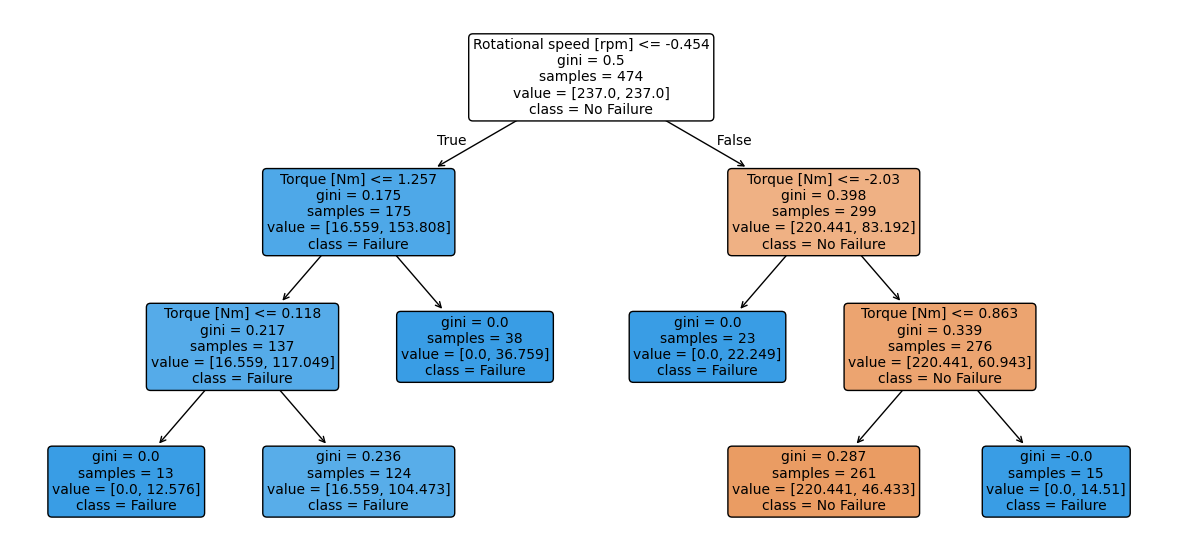

In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Plot the simplified tree
plt.figure(figsize=(15, 7))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Failure', 'Failure'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


In [117]:
y_pred = dt_model.predict(X_test_std)

In [118]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.8529411764705882
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.86      0.82      0.84        94

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204

Confusion Matrix:
 [[97 13]
 [17 77]]
